In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
image1 = cv2.imread('course/DATA/dog_backpack.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('course/DATA/watermark_no_copy.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

(1280, 1277, 3)

In [3]:
image1 = cv2.resize(image1, dsize=(1200, 1200))

image2 = cv2.resize(image2, dsize=(1200, 1200))

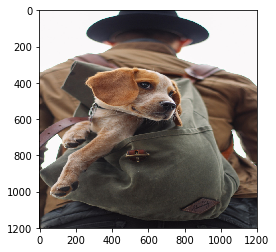

In [4]:
plt.imshow(image1)

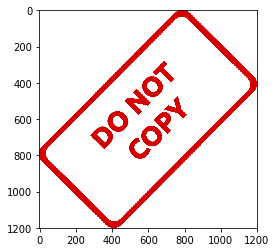

In [5]:
plt.imshow(image2)

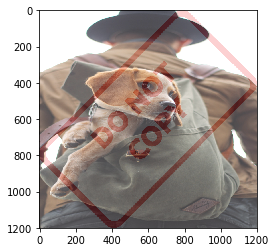

In [6]:
blended_image = cv2.addWeighted(src1=image1, alpha=0.8, src2=image2, beta=0.2, gamma=10)

plt.imshow(blended_image)

In [7]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER IMAGE (NO BLENDING)
# Numpy reassignment

In [8]:
image1 = cv2.imread('course/DATA/dog_backpack.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('course/DATA/watermark_no_copy.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

In [9]:
large_image = image1
small_image = image2

In [10]:
small_image = cv2.resize(small_image, dsize=(600, 600))

In [11]:
x_offset = 0
y_offset = 0

In [12]:
# x: width
# y: height
x_end = x_offset + small_image.shape[1]
y_end = y_offset + small_image.shape[0]

(1401, 934, 3)


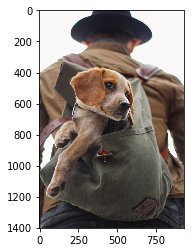

In [13]:
# The way Numpy thinks about image is opposite to us
# Numpy:
# - row: height (x)
# - column: width (y)
plt.imshow(large_image)

print(large_image.shape)

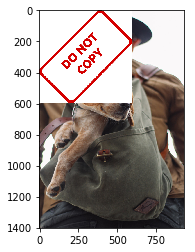

In [14]:
large_image[y_offset:y_end,x_offset:x_end] = small_image

plt.imshow(large_image)

In [15]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES

In [16]:
# transform image to grayscale
# inverse image to black background, white text
# change to image which has 3 color dimensions
# merge old image to get red
# use bitwise_or to merge region of interest with watermark (ROI)
# merge ROI to large image

In [17]:
image1 = cv2.imread('course/DATA/dog_backpack.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = cv2.imread('course/DATA/watermark_no_copy.png')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

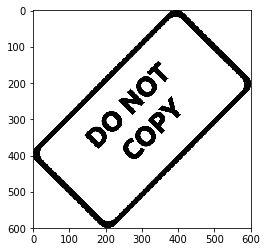

In [18]:
image2 = cv2.resize(image2, dsize=(600, 600))

gray_image2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_image2, cmap='gray')

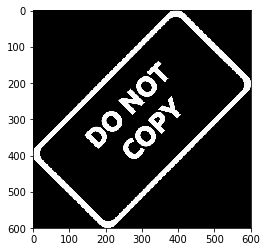

In [19]:
mark_inverse = cv2.bitwise_not(gray_image2)

plt.imshow(mark_inverse, cmap='gray')

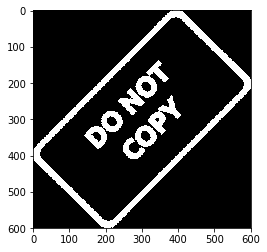

In [27]:
white_background = np.full(image2.shape, 255, dtype=np.uint8)

mark = cv2.bitwise_or(white_background, white_background, mask=mark_inverse)

plt.imshow(mark)

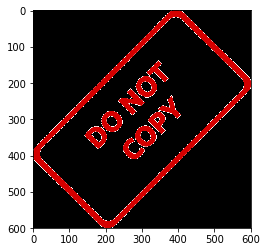

In [37]:
# how does this bitwise_or work? (the role of mask)
# ---
# why white > red > black (bitwise_or without mask)
# however, mask override white with red
final_mark = cv2.bitwise_or(image2, image2, mask=mark_inverse)

plt.imshow(final_mark)

(1401, 934, 3)
334 934
801 1401


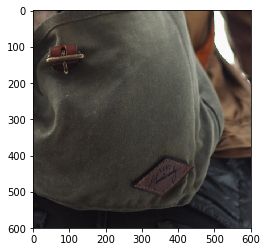

In [43]:
large_image = image1
small_image = final_mark

large_image_shape = large_image.shape
small_image_shape = small_image.shape

print(large_image.shape)
print(large_image_shape[1] - small_image_shape[1], large_image_shape[1])
print(large_image_shape[0] - small_image_shape[0], large_image_shape[0])

roi = image1[large_image_shape[0] - small_image_shape[0]:large_image_shape[0], large_image_shape[1] - small_image_shape[1]:large_image_shape[1]]

plt.imshow(roi)

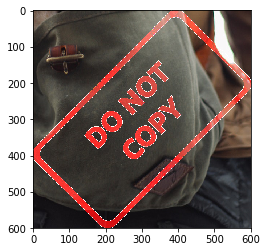

In [44]:
roi = cv2.bitwise_or(roi, final_mark)

plt.imshow(roi)

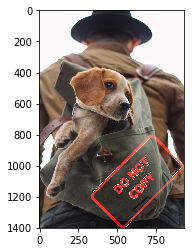

In [45]:
large_image[large_image_shape[0] - small_image_shape[0]:large_image_shape[0], large_image_shape[1] - small_image_shape[1]:large_image_shape[1]] = roi

plt.imshow(large_image)